<a href="https://colab.research.google.com/github/kh-ops69/ML_NLP/blob/master/datasetConcat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pd.set_option("display.max_colwidth", None)

In [ ]:
df1 = pd.read_csv("df_hateful.csv")
df1 = df1.drop(['Unnamed: 0','author_id', 'created_at', 'id'], axis=1)

In [ ]:
df1.sample(5)

,text
130,"RT @AnnCoulter: Const requires 2/3ds vote to override a presidential veto. According to idiot McCain, it ALSO takes 2/3ds vote to pass law…"
1515,"@bioware Fix the bugs, make chars &amp; anims attractive, and fire your #feminists and #SJWs! Then I will buy #MassEffectAndromeda"
1526,@SLASHLEY23 Hate me all you want but I've been the only honest person you've ever met. You can't blame me for your stupidity.
1332,@Just_a_Texan I think Liberals get this a little wrong. It's not about hating Moslems. It's about not living under #Sharia. Not all Moslems are extremists
707,its funny bc people think im quiet\n\nbut im just listening to everyones convos\n\nand figuring out ur weaknesses\n\nto destroy u later in life


In [ ]:
df1['label'] =1
df1 = df1.rename({'text':'TITLE'}, axis=1)
df1.sample(5)

,TITLE,label
1460,"Black people low budget cookouts have quarter legs for the old heads and bullshit hotdogs for the ""kids"" 😭😭😭😭😭",1
1043,@FoxNews \nThere R AA/Black women (I/Others) being used illegally Gov/Gov..Intel Testing..Hush-Hush..,1
1174,Demand action on air #pollution NOW - clean up Europe’s toxic #coal smog! #darkcloud https://t.co/Vm1It6h4ou,1
1413,"cc @mcgregormt, who knows better than anyone how much I hate Paul Ryan Powerpoints. https://t.co/M2N3SdAO56",1
571,"@TammyNederveld @EnglishRussia1 He is rubbish, a subhuman idiot ! Him and his friends...",1


In [ ]:
df2 = pd.read_csv("english_dataset.tsv", sep="\t")
df2 = df2.rename({'text':'TITLE','task_1': 'conclusion', 'task_2':'type', 'task_3':'final'})
df2 = df2.drop(['text_id'], axis=1)

In [ ]:
df2.sample(5)

,text,task_1,task_2,task_3
4690,Zaghari-Ratcliffe’s husband 'resented Boris Johnson' https://t.co/T9EE7R4Jve #BorisJohnsonShouldNotBePM #FreeNazanin,HOF,HATE,TIN
3508,How much would you be willing to pay to see Trump get the shit kicked out of him? #fucktrump,HOF,OFFN,TIN
4598,See who funded the #AbortionBan! You may be surprised. https://t.co/VRPVMQ1j3K via @sludge #AbortionRights #FuckTrump,HOF,PRFN,TIN
3626,@GrouciDjamila @PurpleApePal @dicapriofdn 😡😡 #bastards #boycottchina it breaks my 💔 #stopanimalabuse #friendsnotfood #dog #cat,NOT,NONE,NONE
5489,"But the free, independent and brave media of Pakistan has pretended that nothing happened...so much for Pakistans dictated democracy and so much Pakistani muzzled media",HOF,HATE,TIN


In [ ]:
q = np.where(np.logical_and(df2.task_1!='NOT',df2.task_2!='NONE', df2.task_3!='NONE'))

In [ ]:
len(q[0])

2261

In [ ]:
lst = []
for i in q[0]:
  # print(df2.iloc[i].text, '\n')
  lst.append(df2.iloc[i].text)
lst

In [ ]:
df2_new = pd.DataFrame(lst, columns=['TITLE'])

In [ ]:
df2_new.columns, df2_new.sample(5), df2_new.TITLE.iloc[1]

(Index(['TITLE'], dtype='object'),
                                                                                                                                                                                                                                                                                           TITLE
 1492                                                                                                                                                                                                     #PHIvsATL why does Gabe Kapler look like he just needs a good ass whipping? #douchebag
 2191  When ppl wear religion on their faces in cricketing world, no1 objects. They wear d logos of cigarettes n alcohol adds, it doesn't matter to anyone. Y they want to snatch Dhoni's freedom of respecting his country's Armed Force ? Height of hypocrisy n meanness.  #DhoniKeepsTheGlove
 1355                                                                                             

In [ ]:
df2_new['label'] = 1

In [ ]:
df3 = pd.read_csv('train.csv', encoding='ISO-8859-1')
df3 = df3.drop(['id'], axis=1)
df3 = df3.rename({'tweet':'TITLE'}, axis=1)

In [ ]:
df3_zero = df3.iloc[np.where(df3.label == 0)]

In [ ]:
df3_zero.shape

(29720, 2)

In [ ]:
np.random.seed(10)

remove_n = 27000
drop_indices = np.random.choice(df3_zero.index, remove_n, replace=False)
df3_subset = df3.drop(drop_indices)

In [ ]:
df3_subset.shape

(9962, 2)

In [ ]:
import matplotlib.pyplot as plt

(array([2720.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2242.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

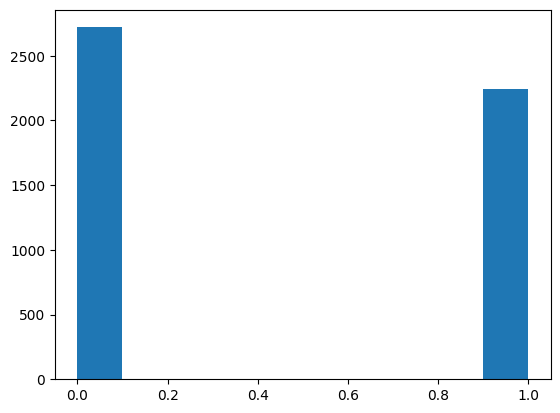

In [ ]:
plt.hist(df3_subset.label)

In [ ]:
df3_subset

,label,TITLE
1,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,0,bihday your majesty
4,0,factsguide: society now #motivation
6,0,@user camping tomorrow @user @user @user @user @user @user @user dannyÃ¢ÂÂ¦
8,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers Ã¢ÂÂ¦
...,...,...
31946,1,@user omfg i'm offended! i'm a mailbox and i'm proud! #mailboxpride #liberalisme
31947,1,@user @user you don't have the balls to hashtag me as a but you say i am to weasel away.. lumpy tony.. dipshit.
31948,1,"makes you ask yourself, who am i? then am i anybody? until ....god . oh thank you god!"
31954,0,#holiday bull up: you will dominate your bull and you will direct it whatever you want it to do. when you


In [ ]:
df3.columns

Index(['label', 'TITLE'], dtype='object')

In [ ]:
df4 = pd.read_csv('neutral_dataset1.csv')

In [ ]:
df4.sample(10)

,TITLE,label
1285,8 things to know about Amazon's new Fire Phone,0
5343,The Rolling Stones in Israel: Historic occasion and a thrilling musical experience,0
6298,Anti-tobacco laws up in smoke,0
5167,Comedian Katt Williams denies pulling gun on heckler 0,0
7272,Spread of polio now declared a world health emergency,0
6547,Michelle Obama assails plan to lower school lunch standards,0
1813,Gold Eases On Profit Taking,0
2620,UPDATE 4-Two senior Twitter executives resign as growth lags,0
11812,Lenovo Files For New Glass-Like Device Patent,0
5139,"""Edwards members run for 'love, respect, joy'""",0


In [ ]:
df4['label'] = 0

In [ ]:
frames = [df1, df2_new, df3_subset, df4]
final_df = pd.concat(frames)

In [ ]:
final_df

,TITLE,label
0,I hate er chase because if the Bitch that works there she's literally evil,1
1,RT @nyctophil3: Pineapples do not belong on pizza. Y'all niggas are nasty.,1
2,Niggas keep talking about women wearing weave but be sick when a bitch up a fro on they ass. 😭,1
3,@vappywave idiot that's not gonna work. you gotta put flame stickers on it to make it go faster,1
4,RT @ayevonnn: bruh i fucking hate people like this 😤 https://t.co/dceEXQhnhq,1
...,...,...
11995,Windows Phone still isn't close to solving its biggest problem,0
11996,Twitter overhauls photo system to compete with Instagram – a huge benefit for ...,0
11997,Dating site matched wrong people as experiment,0
11998,"""Navy NeRD eReader Lacks Ports and WiFi, but Comes Chock Full of Books""",0


(array([14720.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  6269.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

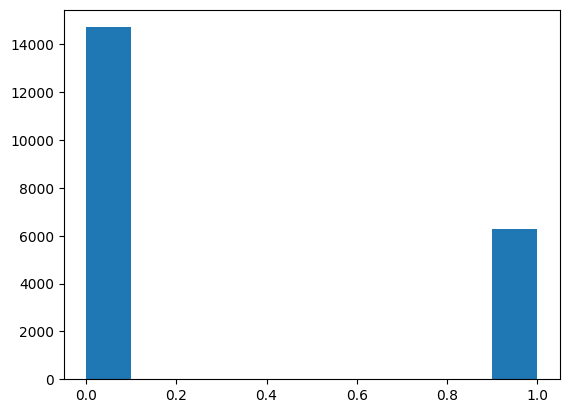

In [ ]:
plt.hist(final_df.label)

dataset cleanup - only numbers and special chars

In [ ]:
import re

In [ ]:
for i in range(33, 65):
  print(chr(i))
print(ord('@'))

In [ ]:
special_chars = []
for i in range(33,65):
  special_chars.append(chr(i))
special_chars

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@']

In [ ]:
str(special_chars)

'[\'!\', \'"\', \'#\', \'$\', \'%\', \'&\', "\'", \'(\', \')\', \'*\', \'+\', \',\', \'-\', \'.\', \'/\', \'0\', \'1\', \'2\', \'3\', \'4\', \'5\', \'6\', \'7\', \'8\', \'9\', \':\', \';\', \'<\', \'=\', \'>\', \'?\', \'@\']'

In [ ]:
final_df.TITLE = final_df.TITLE.str.replace(str(special_chars), ' ')

<ipython-input-78-925b26950ad7>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  final_df.TITLE = final_df.TITLE.str.replace(str(special_chars), ' ')


In [ ]:
type(final_dfs)

pandas.core.series.Series

In [ ]:
final_dfs = pd.DataFrame(final_dfs)

In [ ]:
final_df.TITLE = final_df.TITLE.astype(str).apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

In [ ]:
final_df

,TITLE,label
0,I hate er chase because if the Bitch that works there she s literally evil,1
1,RT nyctophil Pineapples do not belong on pizza Y all niggas are nasty,1
2,Niggas keep talking about women wearing weave but be sick when a bitch up a fro on they ass,1
3,vappywave idiot that s not gonna work you gotta put flame stickers on it to make it go faster,1
4,RT ayevonnn bruh i fucking hate people like this https t co dceEXQhnhq,1
...,...,...
11995,Windows Phone still isn t close to solving its biggest problem,0
11996,Twitter overhauls photo system to compete with Instagram a huge benefit for,0
11997,Dating site matched wrong people as experiment,0
11998,Navy NeRD eReader Lacks Ports and WiFi but Comes Chock Full of Books,0


In [ ]:
final_df = final_dfs.join(final_df.label).drop_duplicates()

In [ ]:
final_df.drop_duplicates()

,TITLE,label
0,I hate er chase because if the Bitch that works there she s literally evil,1
0,I hate er chase because if the Bitch that works there she s literally evil,0
0,politico No We should remember very clearly that Individual just admitted to treason TrumpIsATraitor McCainsAHero JohnMcCainDay,1
0,politico No We should remember very clearly that Individual just admitted to treason TrumpIsATraitor McCainsAHero JohnMcCainDay,0
0,Carney begins implementation of root-and-branch review in Bank of England,1
...,...,...
31934,lady banned from kentucky mall user jcpenny kentucky,1
31944,you re surrounded by people who love you even more than you deserve and yet why are so hateful,0
31946,user omfg i m offended i m a mailbox and i m proud mailboxpride liberalisme,1
31947,user user you don t have the balls to hashtag me as a but you say i am to weasel away lumpy tony dipshit,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
final_df.to_csv('/content/drive/My Drive/TwitterDF.csv')

In [ ]:
df = final_df.to_csv('')